[  0   0   0 ... 212 212 213]


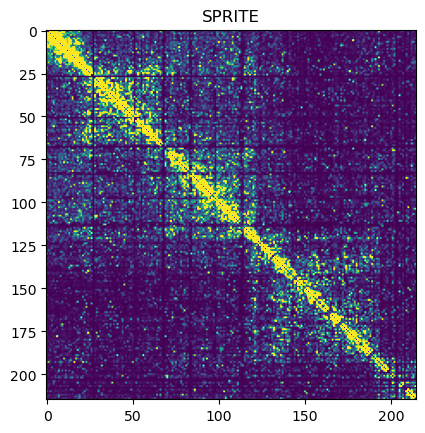

[  0   0   0 ... 213 213 214]


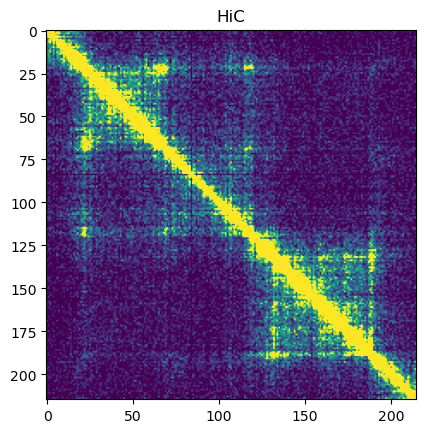

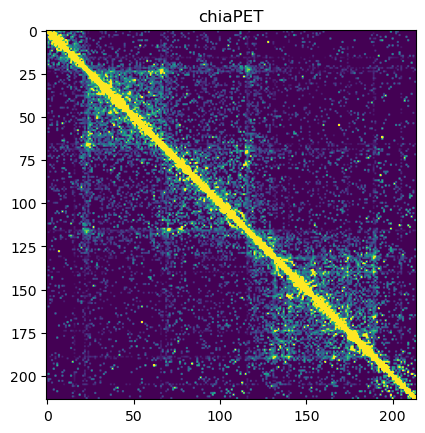

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def read_sparse_matrix(filename):
    with open(filename, 'r') as file:
        rows, cols, value = map(float, file.readline().split())
        data = []
        row_indices = []
        col_indices = []
        for line in file:
            row, col, value = map(float, line.split())
            data.append(value)
            row_indices.append(int(row))
            col_indices.append(int(col))
        #print(col_indices)
        a = min([min(col_indices), min(row_indices)])
        b = max([max(col_indices), max(row_indices)])
        row_indices = np.array(row_indices) - a
        col_indices = np.array(col_indices) - a
        print(row_indices)
        m = np.zeros((b-a+1,b-a+1), dtype=float)
        for x, y, z in zip (row_indices, col_indices, data):
            m[x,y] = z
            m[y,x] = z
    return m

# Example usage
filename = 'SPRITE_region.txt'
SPRITE_matrix = read_sparse_matrix(filename)
fig, ax = plt.subplots()
ax.imshow(SPRITE_matrix, vmax=1)
ax.set_title('SPRITE')
plt.show()

filename = 'HiC_region_5000.txt'
HiC_matrix = read_sparse_matrix(filename)
fig, ax = plt.subplots()
ax.imshow(HiC_matrix, vmax=10)
ax.set_title('HiC')
plt.show()

filename = 'region_of_interest_chr1_178421513-179491193_res5000bp.txt'
chiaPET_matrix = np.loadtxt(filename, dtype='float', delimiter=None)
fig, ax = plt.subplots()
ax.imshow(chiaPET_matrix, vmax=5)
ax.set_title('chiaPET')
plt.show()

In [80]:
print(chiaPET_matrix.shape[0])

214


In [78]:
np.save('HiC.npy',HiC_matrix)
np.save('SPRITE.npy',SPRITE_matrix)
np.save('chiaPET.npy',chiaPET_matrix)

[  0   0   0 ... 212 212 213]


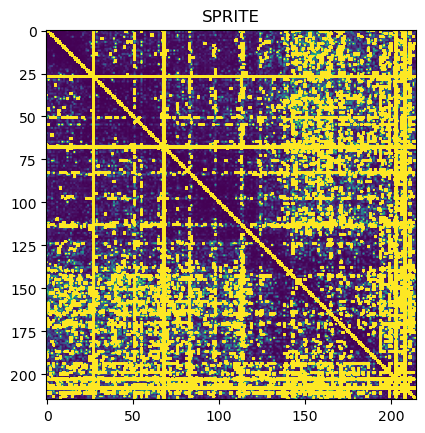

[  0   0   0 ... 213 213 214]


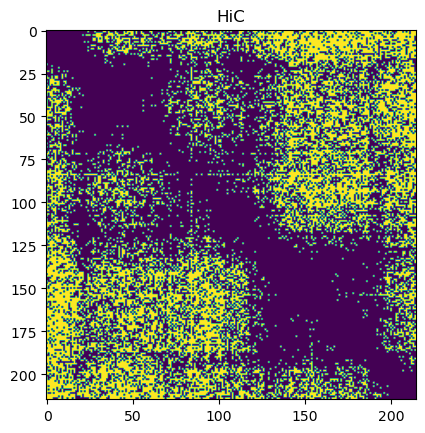

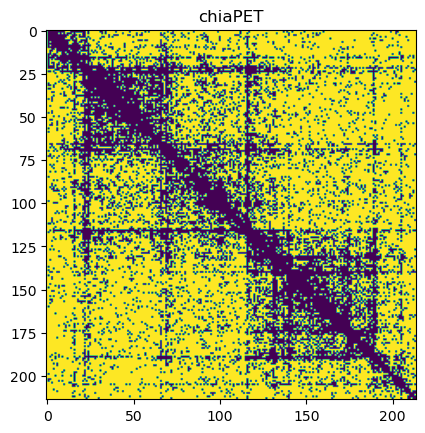

In [13]:
epsilon = 1E-30
filename = 'SPRITE_region.txt'
SPRITE_matrix = read_sparse_matrix(filename)
SPRITE_matrix = 1/(SPRITE_matrix + epsilon)
fig, ax = plt.subplots()
ax.imshow(SPRITE_matrix, vmax=200)
ax.set_title('SPRITE')
plt.show()

filename = 'HiC_region_5000.txt'
HiC_matrix = read_sparse_matrix(filename)
HiC_matrix = 1/(HiC_matrix + epsilon)
fig, ax = plt.subplots()
ax.imshow(HiC_matrix)
ax.set_title('HiC')
plt.show()

filename = 'region_of_interest_chr1_178421513-179491193_res5000bp.txt'
chiaPET_matrix = np.loadtxt(filename, dtype='float', delimiter=None)
chiaPET_matrix = 1/(chiaPET_matrix + epsilon)
fig, ax = plt.subplots()
ax.imshow(chiaPET_matrix)
ax.set_title('chiaPET')
plt.show()